# Stat 201A: Problem Set (Nov 20)
Matthew Dworkin

In [104]:
import numpy as np
import matplotlib.pyplot as plt
def apply_P(P, pi):
    return pi.T @ P

## 1. Simulation of a Markov Process
### a)
$$P = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4
\end{bmatrix}$$

### b) Simulate one Realization

In [228]:
P = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])

def get_distribution(state):
    """
    Given a state, returns a probability distribution over the states accordingly (all ones and zeros).
    """
    
    state -= 1 #1 indexed for the user, not zero
    dist = np.zeros((3, 1))
    dist[state] = 1
    return dist

def get_state(distribution):
    """
    Realizes the state from a given distribution.
    
    """
    return np.random.choice([1, 2, 3], 1, p=np.squeeze(distribution))[0]

In [218]:
curr_dist = get_distribution(1)
curr_dist.shape

(3, 1)

In [229]:
np.random.seed(201)
states = []
num_steps = 100

curr_dist = get_distribution(1)
for i in range(num_steps):
    states.append(get_state(curr_dist))
    curr_dist = apply_P(P, curr_dist).T

In [230]:
np.array(states)

array([1, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2,
       3, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3,
       2, 2, 3, 2, 2, 3, 1, 2, 3, 3, 1, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2,
       2, 3, 2, 2, 1, 3, 3, 2, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 2, 1, 3, 3,
       3, 1, 3, 2, 3, 2, 2, 2, 3, 1, 3, 2])

These are the (first 100) states we visit in this realization of the Markov process, starting from state 1!


## 2. Stationary Distribution
### a) Theoretical Stationary Distribution

We solve for the eigenvalues of $P^T$ and normalize the eigenvector corresponding to the eigenvalue of 1.

In [231]:
pi_inf = np.linalg.eig(P.T)[1][:, 0] / np.sum(np.linalg.eig(P.T)[1][:, 0])
pi_inf

array([0.2       , 0.51111111, 0.28888889])

We observe that this matches what we get if we start at $\pi_{\infty}$ and apply $P$ to it.

In [232]:
apply_P(P, pi_inf), pi_inf

(array([0.2       , 0.51111111, 0.28888889]),
 array([0.2       , 0.51111111, 0.28888889]))

### b) Empirical Stationary Distribution
We start from some arbitrary distribution $\pi_0$

In [233]:
np.random.seed(201)
pi_0 = np.random.uniform(low=0, high=1, size=3)
pi_0 /= np.sum(pi_0)
pi_0

array([0.07733646, 0.50777978, 0.41488376])

In [234]:
num_transitions = 50

results = np.zeros((num_transitions, 3))
pi_curr = pi_0
for i in range(num_transitions):
    pi_curr = apply_P(P, pi_curr)
    results[i] = pi_curr

In [235]:
norms = np.power(np.linalg.norm(results - pi_inf, axis=1), 2)
norms

array([2.75759992e-03, 2.75759992e-05, 2.75759992e-07, 2.75759992e-09,
       2.75759992e-11, 2.75759992e-13, 2.75759993e-15, 2.75759995e-17,
       2.75760016e-19, 2.75759851e-21, 2.75764798e-23, 2.75789554e-25,
       2.76245299e-27, 2.81008586e-29, 3.67467433e-31, 3.46667390e-32,
       3.69778549e-32, 1.92592994e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32])

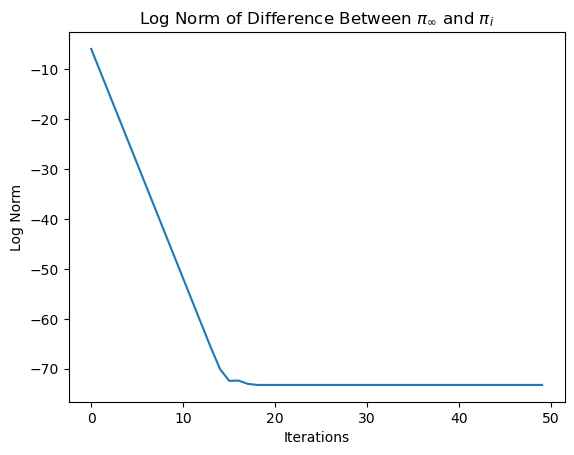

In [236]:
plt.plot(np.arange(num_transitions), np.log(norms));
plt.title("Log Norm of Difference Between $\pi_{\infty}$ and $\pi_i$");
plt.ylabel("Log Norm");
plt.xlabel("Iterations");

We repeat for a new distribution.

In [237]:
pi_0_new = np.array([0.8, 0.05, 0.15])

In [238]:
num_transitions = 50

results_new = np.zeros((num_transitions, 3))
pi_curr_new = pi_0_new
for i in range(num_transitions):
    pi_curr_new = apply_P(P, pi_curr_new)
    results_new[i] = pi_curr_new

In [239]:
norms_new = np.power(np.linalg.norm(results_new - pi_inf, axis=1), 2)
norms_new

array([3.58524691e-02, 3.58524691e-04, 3.58524691e-06, 3.58524691e-08,
       3.58524691e-10, 3.58524691e-12, 3.58524691e-14, 3.58524690e-16,
       3.58524676e-18, 3.58524602e-20, 3.58525345e-22, 3.58516428e-24,
       3.58397659e-26, 3.57970288e-28, 3.41737009e-30, 2.77333912e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32, 1.54074396e-32, 1.54074396e-32,
       1.54074396e-32, 1.54074396e-32])

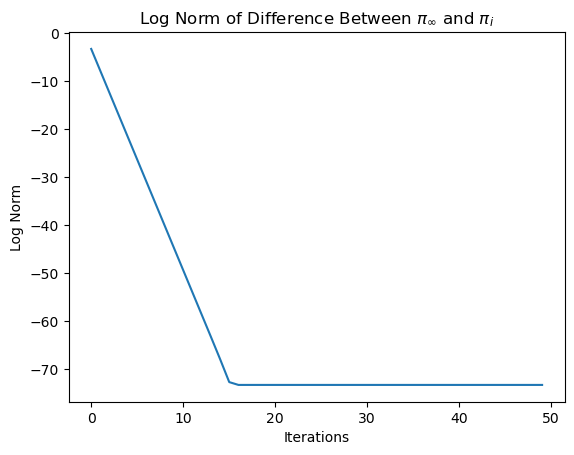

In [240]:
plt.plot(np.arange(num_transitions), np.log(norms_new));
plt.title("Log Norm of Difference Between $\pi_{\infty}$ and $\pi_i$");
plt.ylabel("Log Norm");
plt.xlabel("Iterations");

Both converge rather quickly, and the plots look nearly identical!

## 3. Absorbing State
We modify $P$ such that state 3 is now an absorbing state.

$$P_{\text{new}} = \begin{bmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.0 & 0.0 & 1.0
\end{bmatrix}$$

In [241]:
P_new = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0, 0, 1.0]])
P_new

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0. , 0. , 1. ]])

### a) Empirical Arrival Times
We first try starting from $X_0 = 1$

In [287]:
np.random.seed(420)

def one_simulation(initial_state):

    X_0 = get_distribution(initial_state)
    curr_dist = X_0
    curr_state = get_state(curr_dist)
    arrival_time = 0

    states_visited = [curr_state]


    while curr_state != 3:
        # Get new distribution by applying P_new
        curr_dist = apply_P(P_new, curr_dist)

        # Realize the state
        curr_state = get_state(curr_dist)

        # Track which state we went to
        states_visited.append(curr_state)

        # Get new distribution (binary)
        curr_dist = get_distribution(curr_state)


        # Increment arrival time
        arrival_time += 1

    states_visited.append(3)
    
    return arrival_time, states_visited
one_simulation(1)[0]

14

In [300]:
num_trials = 10000
waiting_times_1 = []
waiting_times_2 = []
for i in range(num_trials):
    waiting_times_1.append(one_simulation(1)[0])
    waiting_times_2.append(one_simulation(2)[0])

Mean Arrival Time from State 1:  4.6163


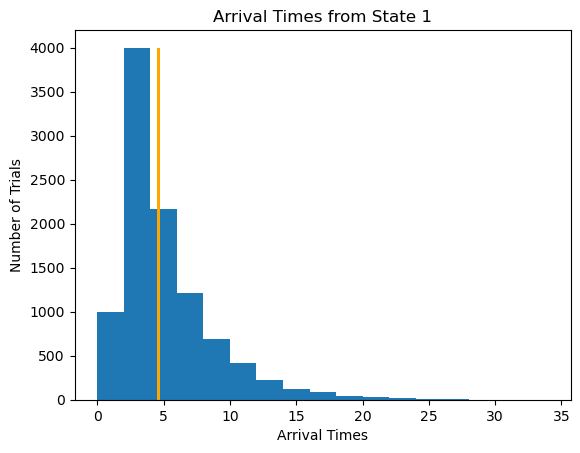

In [328]:
plt.hist(waiting_times_1, bins=np.arange(0, 36, 2));
plt.bar(np.mean(waiting_times_1), height= 4000, color="orange", width=1/5);
plt.title("Arrival Times from State 1");
plt.xlabel("Arrival Times");
plt.ylabel("Number of Trials")
print("Mean Arrival Time from State 1: ", np.mean(waiting_times_1))

Mean Arrival Time from State 2:  3.8556


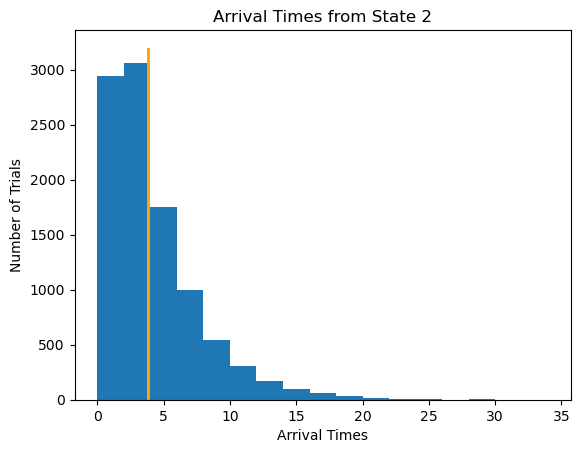

In [329]:
plt.hist(waiting_times_2, bins=np.arange(0, 36, 2));
plt.bar(np.mean(waiting_times_2), height= 3200, color="orange", width=1/5);
plt.title("Arrival Times from State 2");
plt.xlabel("Arrival Times");
plt.ylabel("Number of Trials")
print("Mean Arrival Time from State 2: ", np.mean(waiting_times_2))

It makes sense that the mean is lower if we start in state 2, which we can tell by looking at the transition probabilities!

They also match closely with the theoretical values of 4.615 and 3.846 found in my written work.